##### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline  -- (Only for Jupyter notebooks): Makes sure that plots show up inside the notebook, not in separate windows. 
#This setting is by default now in the updated Jupyter notebook.

sns.set_style('whitegrid')
sns.set_context('notebook')
plt.rc('figure', figsize = (10,6))

##### READ AND  INSPECT DATA

In [2]:
df = pd.read_csv('movies.csv')

In [3]:
df.head(2)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

##### DATA CLEANING

In [6]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

In [7]:
df['rating'].value_counts()

rating
R            3774
PG-13        2112
PG           1252
Not Rated     283
G             153
Unrated        52
NC-17          23
TV-MA           9
TV-PG           5
X               3
Approved        1
TV-14           1
Name: count, dtype: int64

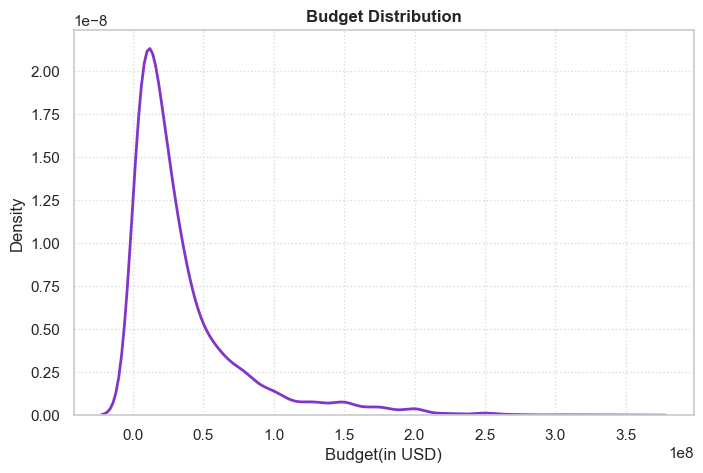

In [8]:
plt.figure(figsize = (8, 5))

sns.kdeplot(data = df['budget'], color = '#8236c9', linewidth = 2)

plt.grid(alpha = 0.7, linestyle = ':')
plt.title('Budget Distribution', fontweight = 'bold')
plt.xlabel('Budget(in USD)')
plt.savefig('Budget Distribution.jpg', dpi = 700)
plt.show()

In [9]:
df['budget'] = df['budget'].fillna(df['budget'].median())

In [10]:
df['budget'].value_counts()

budget
20500000.0    2174
20000000.0     233
30000000.0     229
25000000.0     211
10000000.0     208
              ... 
34200000.0       1
30000.0          1
29750000.0       1
5250000.0        1
58750.0          1
Name: count, Length: 413, dtype: int64

In [11]:
df.dropna(inplace=True, how ='any')

In [12]:
df.drop_duplicates(subset='name', inplace =True)

In [13]:
df['Released Year']=df['released'].astype('str').str.extract(r'(\d{4})')
df.head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980


In [14]:
df.sort_values(by = 'gross', ascending = False, inplace = False).head(3)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Released Year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997


##### DESCRIPTIVE ANALYTICS

In [15]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7318.000000,7318.000000,7.318000e+03,7.318000e+03,7.318000e+03,7318.000000
mean,2000.478683,6.401558,8.945519e+04,3.143254e+07,7.701823e+07,107.366357
std,11.035075,0.963234,1.642304e+05,3.579441e+07,1.624521e+08,18.453895
min,1980.000000,1.900000,3.400000e+01,6.000000e+03,3.090000e+02,63.000000
25%,1991.000000,5.800000,9.800000e+03,1.400000e+07,4.477723e+06,95.000000
50%,2001.000000,6.500000,3.300000e+04,2.050000e+07,1.977628e+07,104.000000
75%,2010.000000,7.100000,9.500000e+04,3.200000e+07,7.417954e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


##### EDA

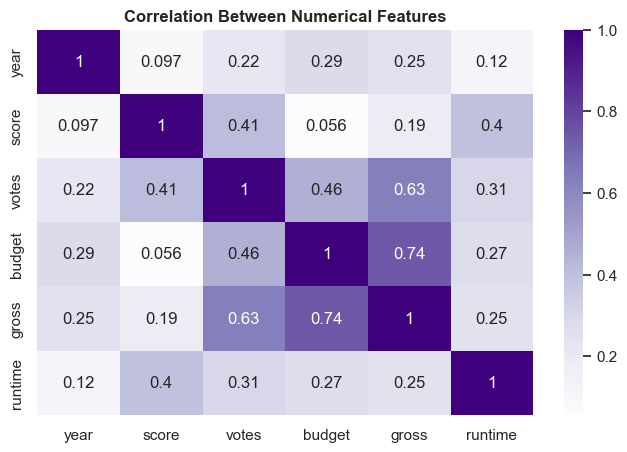

In [16]:
#Finding the correlationship betweeen the different variables.
plt.figure(figsize = (8, 5))
movie = df.select_dtypes(include=['number'])

sns.heatmap(movie.corr(), cmap ='Purples', annot=True)
plt.title('Correlation Between Numerical Features', fontweight = 'bold')
plt.savefig('Correlation Between Numerical Features.jpg', dpi = 700)

plt.show()

### What drives more gross?

In [17]:
df.drop('year', axis=1, inplace=True)

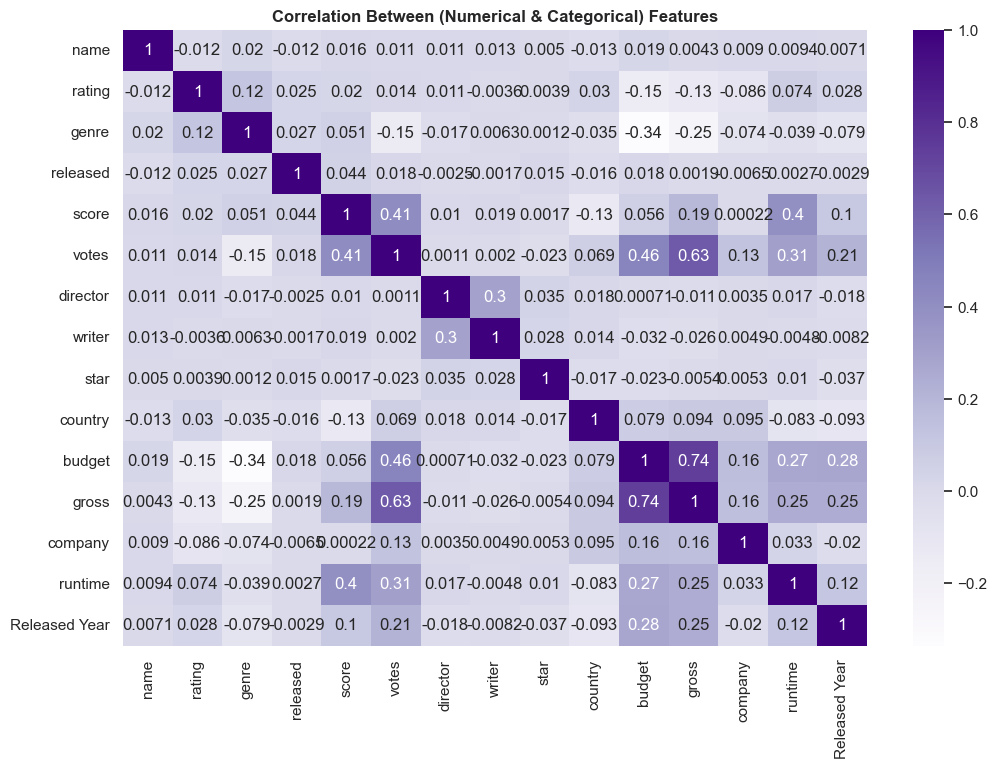

In [18]:
df_num = df.copy()

for col in df_num.columns:
    if (df_num[col].dtype == 'object'):
        df_num[col] = df_num[col].astype('category')
        df_num[col] = df_num[col].cat.codes

plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr(), cmap ='Purples', annot=True)
plt.title('Correlation Between (Numerical & Categorical) Features', fontweight = 'bold')

plt.savefig('Correlation Between (Numerical & Categorical) Features.jpg', dpi = 700)

plt.show()

Since, we also found that there is a stronger relationship between the votes and the gross we will confirm that.

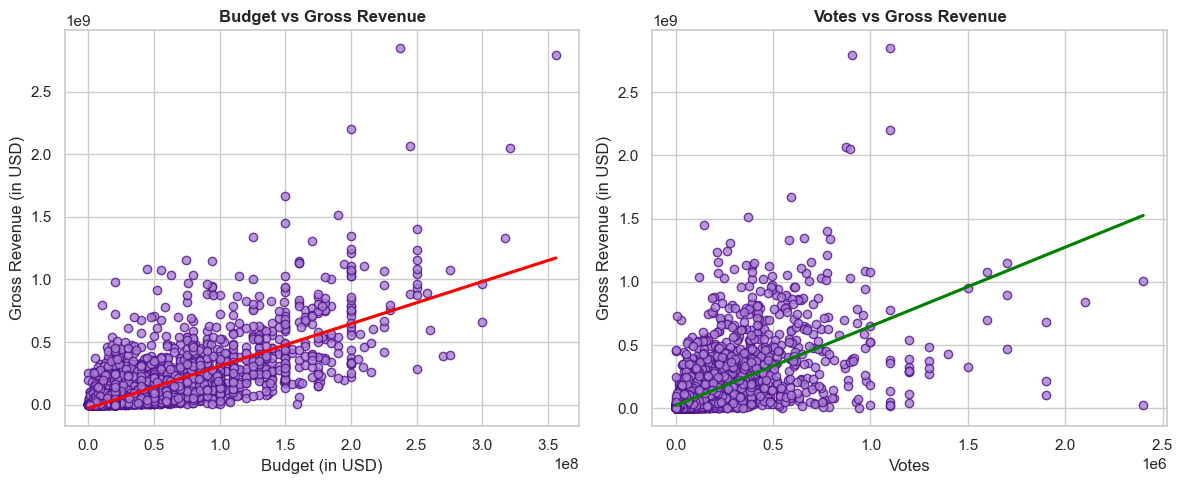

In [19]:
plt.figure(figsize=(12, 5))  

plt.subplot(1, 2, 1)
sns.regplot(x=df['budget'], y=df['gross'], ci=False, line_kws={'color': 'red'}, scatter_kws={'color':'#a980d1', 'edgecolor': '#50128c' })
plt.title('Budget vs Gross Revenue', fontweight = 'bold')
plt.xlabel('Budget (in USD)')
plt.ylabel('Gross Revenue (in USD)')

plt.subplot(1, 2, 2)
sns.regplot(x=df['votes'], y=df['gross'], ci=False, line_kws={'color': 'green'}, scatter_kws={'color':'#a980d1', 'edgecolor': '#50128c' })
plt.title('Votes vs Gross Revenue', fontweight = 'bold')
plt.xlabel('Votes')
plt.ylabel('Gross Revenue (in USD)')

plt.tight_layout()

plt.savefig('budget_votes_vs_gross_comparison.png', dpi=700)

plt.show()


Is this true for all the movies, is the data evenly distributed?

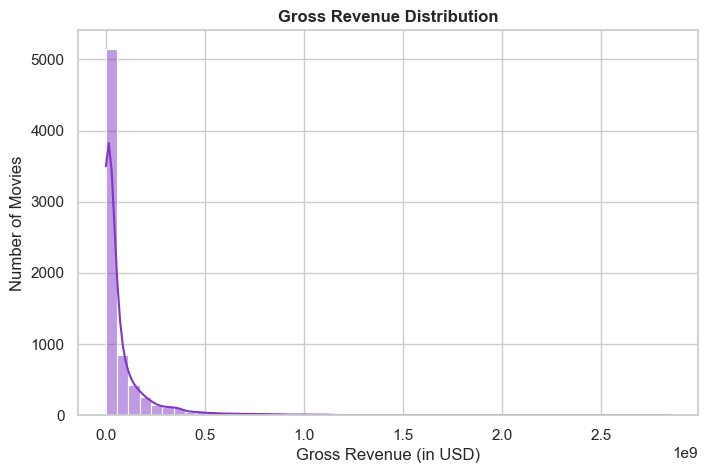

In [31]:
plt.figure(figsize = (8, 5))

sns.histplot(data=df['gross'], bins=50, kde = True, color ='#8236c9' )

plt.ylabel('Number of Movies')
plt.xlabel('Gross Revenue (in USD)')
plt.title('Gross Revenue Distribution', fontweight = 'bold')
plt.savefig('Gross Revenue Distribution.png', dpi=700)


plt.show()

Since the data is right skewed and since count of movie which hasn't generated no or less gross is more we can say that most of the movies are generating less money and only few blockbuster movies are are earning more.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


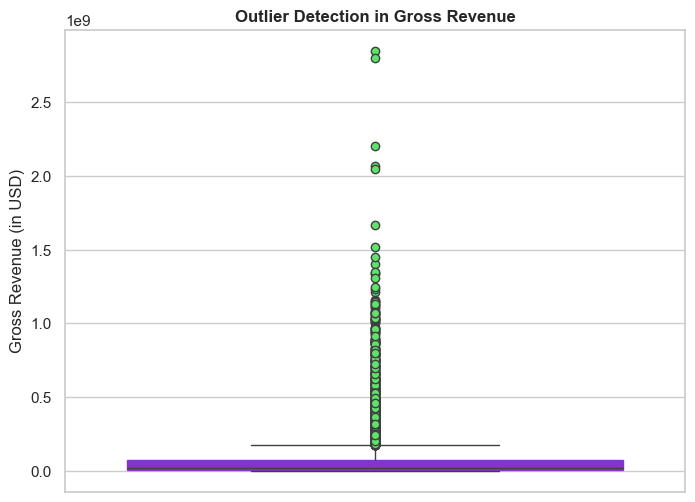

In [21]:
# We wanted to verify where does the 50 % of our data fall and if there are any outliers present.
plt.figure(figsize = (8, 6))

sns.boxplot(data = df['gross'], boxprops = {'color':'#8236c9'}, flierprops = {'markerfacecolor': '#5de36a'})
plt.ylabel('Gross Revenue (in USD)')
plt.title('Outlier Detection in Gross Revenue',fontweight = 'bold')
plt.savefig('Distribution of Gross Revenue- Outlier Identification.png', dpi=700)

plt.show()

Outliers are pulling the average.

Conclusion based on the figure:
1) As votes increase, gross revenue tends to rise more sharply.
2) As budget increases, gross revenue also rises, but less steeply in comparison.

Note: While budget and votes are the two most important factors influencing gross revenue,
this pattern does not apply to all movies.
Just spending more or getting more votes doesn’t guarantee success for every film.

Insights:
To generate higher revenue, we need to invest a decent amount in making the movie — which includes spending on the best resources (like cast, crew, and production quality).
But beyond the investment, what truly boosts revenue is when people enjoy the movie.
Once the audience connects with the film, they rate or vote for it and that drives gross revenue up significantly.

----------

### Does rating affecting the gross?

In [22]:
a = df.groupby(by = 'rating')['gross'].median().sort_values(ascending = False)
a.head()

rating
PG-13       44717098.5
Approved    36565280.0
G           34837994.0
PG          29196409.0
R           12563115.5
Name: gross, dtype: float64

In [23]:
u = a.filter(items=['G', 'PG', 'PG-13', 'R', 'NC-17']).sort_values(ascending = False)
print(u)

PG-13    44717098.5
G        34837994.0
PG       29196409.0
R        12563115.5
NC-17     2671291.0
Name: gross, dtype: float64


C:\Users\loki\AppData\Local\Temp\ipykernel_10364\3853083759.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = u.index, y = u.values, palette=shades)


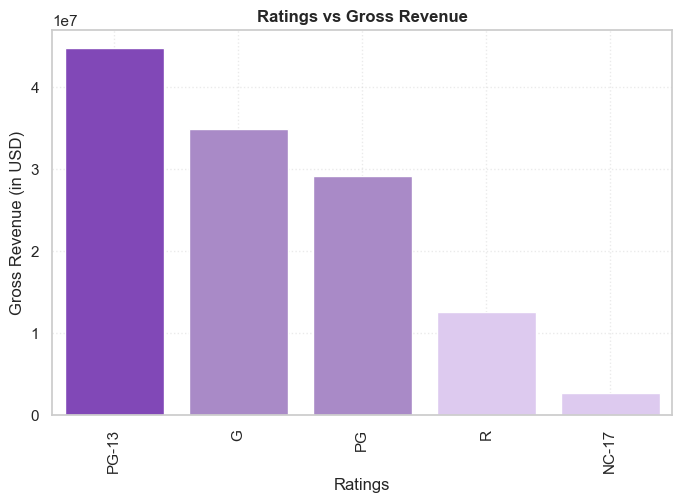

In [24]:
plt.figure(figsize = (8, 5))

shades = ['#8236c9','#a980d1', '#a980d1','#ddc4f5', '#ddc4f5']
sns.barplot(x = u.index, y = u.values, palette=shades)

plt.grid(linestyle = ':', alpha = 0.4)
plt.title('Ratings vs Gross Revenue', fontweight = 'bold')

plt.xticks(rotation = 90)
plt.xlabel('Ratings')
plt.ylabel('Gross Revenue (in USD)')
plt.savefig('Ratings vs Gross Revenue.png', dpi=700)

plt.show()

Conclusion :

Based on the figure, we can understand that movie ratings do have an impact on gross revenue. Movies rated PG-13 tend to generate the highest median gross revenue, followed by PG, G, and R rated movies. This suggests that films with broader audience appeal (like PG-13 and PG) generally perform better financially than those with more restrictive ratings like R or NC-17.

### Has movie budget increased over time?

In [25]:
df['Released Year'] = pd.to_numeric(df['Released Year'], errors='coerce')

#coerce is used when anything that you want to convert into numbers cannot be converted into numbers it replaces it with NaN, instead of throwing an error
df['Released Year'] = pd.to_numeric(df['Released Year'], errors='coerce')

#coerce is used when anything that you want to convert into numbers cannot be converted into numbers it replaces it with NaN, instead of throwing an error

In [26]:
c = df.groupby(by ='Released Year')['budget'].median().sort_index()
c.head()

#It groups the data by year, when you group the data it becomes the index if you want it to becomes the column again you can do it, You can use the command reset_index()
# Then it only selects the budget column and it finds the median of each year which becomes your value and then you sort your index.

Released Year
1980    20500000.0
1981    18000000.0
1982    19500000.0
1983    14200000.0
1984    20500000.0
Name: budget, dtype: float64

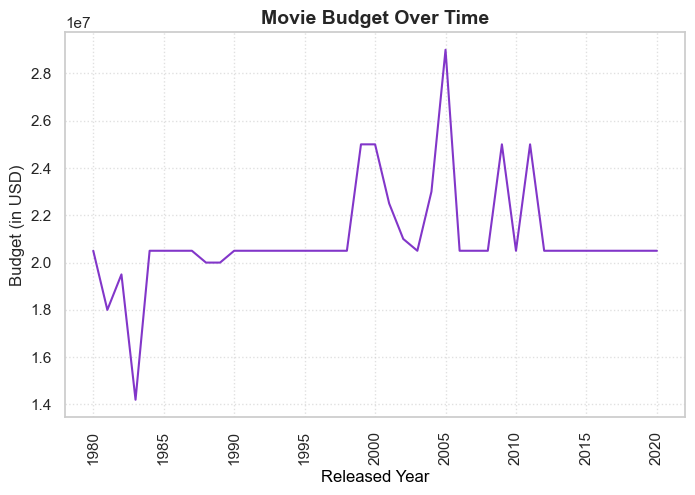

In [27]:
#sns.lineplot(x= df['Released Year'], y = df['budget'])
# It tries to plot every row of the dataset, at some place the values can be repeating and misleading to avoid this chaos we group the data.
plt.figure(figsize = (8, 5))

sns.lineplot(x = c.index, y = c.values, color = '#8236c9')
plt.xticks(rotation = 90)
plt.title('Movie Budget Over Time', fontweight = 'bold', fontsize = 14)

plt.xlabel('Released Year', color='black', loc = 'center')
plt.ylabel('Budget (in USD)')
plt.grid(linestyle = ':', alpha = 0.6)
plt.savefig('Ratings vs Gross Revenue.png', dpi=700)

plt.show()

Insights:

Based on the figure we can say that, The budget for the movie hasn't increased from 1980 to 2020 but we can see that there are some spikes between 1997 and 2013

### Which genres or directors perform best?

C:\Users\loki\AppData\Local\Temp\ipykernel_10364\1164884789.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = r.index, y = r.values, palette=shades)


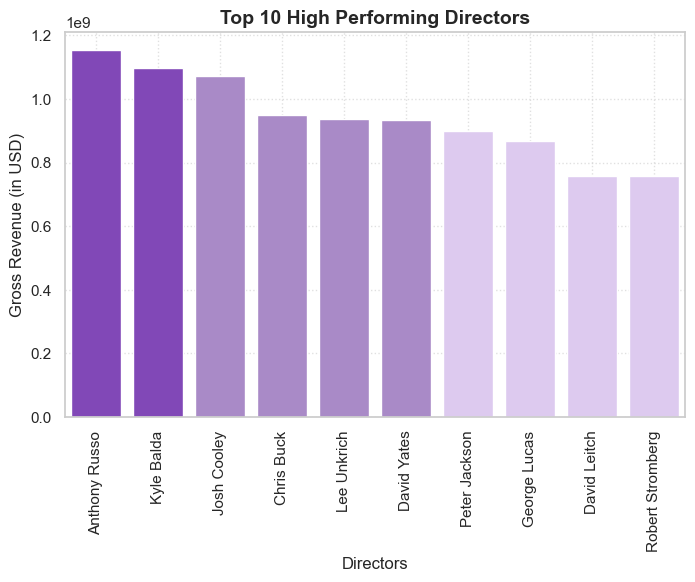

In [28]:
r = df.groupby(by = 'director')['gross'].median().sort_values(ascending=False).head(10)

plt.figure(figsize = (8, 5))

shades = ['#8236c9', '#8236c9', '#a980d1', '#a980d1', '#a980d1', '#a980d1', '#ddc4f5', '#ddc4f5','#ddc4f5','#ddc4f5' ]

sns.barplot(x = r.index, y = r.values, palette=shades)

plt.ylabel('Gross Revenue (in USD)')
plt.xlabel('Directors')
plt.title('Top 10 High Performing Directors', fontweight = 'bold', fontsize = 14)
plt.grid(linestyle = ':', alpha = 0.6)
plt.xticks(rotation = 90)
plt.savefig('Top 10 High Performing Directors.png', dpi=700)

plt.show()

In [29]:
g = df.groupby(by = 'genre')['gross'].median().sort_values(ascending=False).head(10)
g.head()

genre
Animation    129688475.5
Action        50498767.5
Adventure     27989799.0
Fantasy       19595031.0
Horror        19552055.0
Name: gross, dtype: float64

C:\Users\loki\AppData\Local\Temp\ipykernel_10364\2344685033.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =g.index, y = g.values, palette=shades)


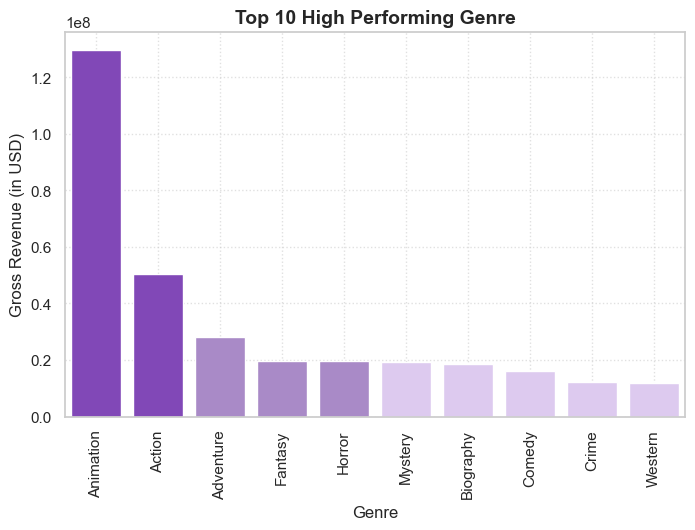

In [30]:
plt.figure(figsize = (8, 5))

shades = ['#8236c9', '#8236c9', '#a980d1', '#a980d1', '#a980d1', '#ddc4f5', '#ddc4f5', '#ddc4f5','#ddc4f5','#ddc4f5' ]
sns.barplot(x =g.index, y = g.values, palette=shades)


plt.title('Top 10 High Performing Genre', fontweight = 'bold', fontsize = 14)
plt.grid(linestyle = ':', alpha = 0.6)
plt.xticks(rotation = 90)
plt.xlabel('Genre')
plt.ylabel('Gross Revenue (in USD)')
plt.savefig('Top 10 High Performing Genre.png', dpi=700)

plt.show()